In [1]:
from fonctions import *

In [2]:
# récupération des articles et des tags

dic_tags_nltk = lire_json("articlesTags_nltk.json")

dic_tags_stanford = lire_json("articlesTags_stanford.json")

new_dic = reorganiser_POS(dic_tags_stanford)

In [3]:
# séparation des informations dans trois listes différentes

chemins_articles = [x for x in new_dic.keys()]

liste_tags = [x[1] for x in new_dic.values()]

liste_titres = [x[2] for x in new_dic.values()]

print(liste_tags[:3])
print(liste_titres[:3])

[['NOUN', 'ADP', 'NUM', 'NOUN', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADJ', 'ADP', 'NUM'], ['DET', 'NOUN', 'DET', 'NOUN', 'PUNCT', 'PRON', 'ADV', 'VERB', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN'], ['NOUN', 'ADP', 'NOUN', 'PUNCT', 'DET', 'NOUN', 'PUNCT']]
['Identification de trois gènes expliquant la virulence de la grippe espagnole de 1918', 'Les chantiers du Président : On ne peut cacher le soleil avec un tamis', 'Gueule de bois ? Quelques remèdes...']


In [4]:
# Vectorisation des documents et création du model

X, V = creer_X(liste_tags, 2, 3)

model = creer_model_KM(4, X)

predictions = model.predict(X)

print(predictions[:100])
print(effectifs_clusters(model))

[0 0 2 1 3 3 1 2 1 0 3 0 1 2 1 1 2 0 2 2 1 1 1 2 1 1 1 0 0 2 1 0 3 2 1 0 1
 1 3 3 3 1 3 3 3 1 3 1 0 3 1 1 0 2 1 1 3 3 1 1 3 2 0 1 1 1 1 1 3 1 2 0 1 0
 2 0 1 3 0 1 1 3 0 3 1 1 1 1 1 1 3 1 1 1 3 2 2 2 0 0]
{0: 1054, 2: 987, 1: 2653, 3: 991}


In [5]:
# extraction de titres d'articles au hasard pour chaque cluster

dictionnaire = dic_complet(X, predictions, liste_tags, liste_titres)

afficher_titres_hasard(2, dictionnaire)

Cluster 0 : 1054 articles
Un narco colombien abattu par un tueur professionnel
DET NOUN ADJ VERB ADP DET NOUN ADJ
Turquie: 60 fonctionnaires jugés après la mort d'un détenu sous la torture
PROPN PUNCT NUM NOUN VERB ADP DET NOUN ADJ VERB ADP DET NOUN
----------
Cluster 1 : 2653 articles
Agriculture : Morosité chez les éleveurs ovins
NOUN PUNCT PROPN ADP DET NOUN NOUN
Plus de 280 morts à Gaza
ADV ADP NUM NOUN ADP PROPN
----------
Cluster 2 : 987 articles
Irak: procès le 31 décembre du lanceur de chaussures sur Bush
PROPN PUNCT NOUN DET NUM NOUN DET NOUN ADP NOUN ADP PROPN
Événement : Un pic de surmortalité au moment du grand froid
NOUN PUNCT DET NOUN ADP NOUN ADP NOUN DET ADJ NOUN
----------
Cluster 3 : 991 articles
20-12-2008 - Gabon : CNAMGS lance sa carte d'Assurance Maladie
NUM PUNCT PROPN PUNCT PROPN VERB DET NOUN PROPN PROPN
Se mettre au diapason des technologies de pointe  Laéroport dEnfidha-Zine El Abidine Ben Ali sera opérationnel au cours de 2009
PRON VERB DET NOUN DET NOUN ADP

In [6]:
# affichage des dimensions caractéristiques de chaque cluster
        
dimensions_clusters(model, V)

Cluster 0:
(DET NOUN) | (ADP DET) | (ADP DET NOUN) | (NOUN ADP) | (NOUN ADP DET) | (DET NOUN ADP) | (NOUN ADJ) | (DET NOUN ADJ) | (VERB ADP DET) | (VERB ADP) | 
----------
Cluster 1:
(DET NOUN) | (NOUN ADJ) | (NOUN PUNCT) | (VERB DET) | (PUNCT DET) | (DET NOUN ADJ) | (VERB DET NOUN) | (ADP PROPN) | (PUNCT DET NOUN) | (PROPN PUNCT) | 
----------
Cluster 2:
(ADP NOUN) | (NOUN ADP) | (NOUN ADP NOUN) | (ADP NOUN ADP) | (DET NOUN ADP) | (DET NOUN) | (ADP PROPN) | (NOUN ADP PROPN) | (NOUN PUNCT) | (NOUN ADJ) | 
----------
Cluster 3:
(PROPN PROPN) | (PROPN PUNCT) | (PUNCT PROPN) | (PROPN PUNCT PROPN) | (PROPN PROPN PUNCT) | (PROPN PROPN PROPN) | (DET NOUN) | (ADP PROPN) | (PROPN VERB) | (PUNCT PROPN PROPN) | 
----------


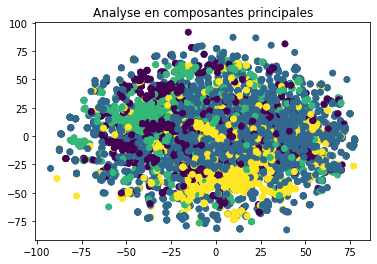

In [7]:
# Tracer l'analyse en composantes principales

tracer_ACP(X, predictions)

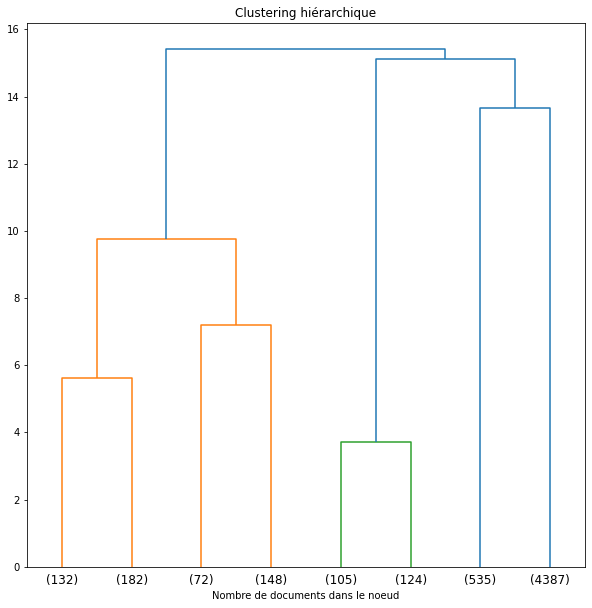

In [5]:
# Tracer le dendrogramme avec un clustering hiérarchique

model = AgglomerativeClustering(n_clusters=4, compute_distances=True)
model = model.fit(X)
tracer_dendrogram(model)

In [6]:
print(effectifs_clusters(model))

{1: 4387, 3: 535, 0: 534, 2: 229}


In [46]:
import nltk

nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or